In [27]:
# 1. Setup and Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better visualization
sns.set_style("whitegrid")
plt.style.use('ggplot')

# 2. Define File Path and Load Data
# We use '../' to navigate up one directory from 'notebooks' to the project root,
# then down into 'data/newsData'.

NEWS_FILE_PATH = '../data/newsData/raw_analyst_ratings.csv'

try:
    # Load the news data
    df_news = pd.read_csv(NEWS_FILE_PATH)
    
    # 3. Initial Inspection
    print(f"Successfully loaded data from: {NEWS_FILE_PATH}")
    print(f"\nDataFrame shape: {df_news.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df_news.head())
    print("\nData types and null counts:")
    df_news.info()

except FileNotFoundError:
    print(f"Error: File not found at {NEWS_FILE_PATH}. Please check the path.")
    df_news = None

Successfully loaded data from: ../data/newsData/raw_analyst_ratings.csv

DataFrame shape: (1407328, 6)

First 5 rows of the dataset:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

       

--- Descriptive Statistics for Headline Length (in characters) ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


C:\Users\Mer\AppData\Local\Temp\ipykernel_10440\501927653.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


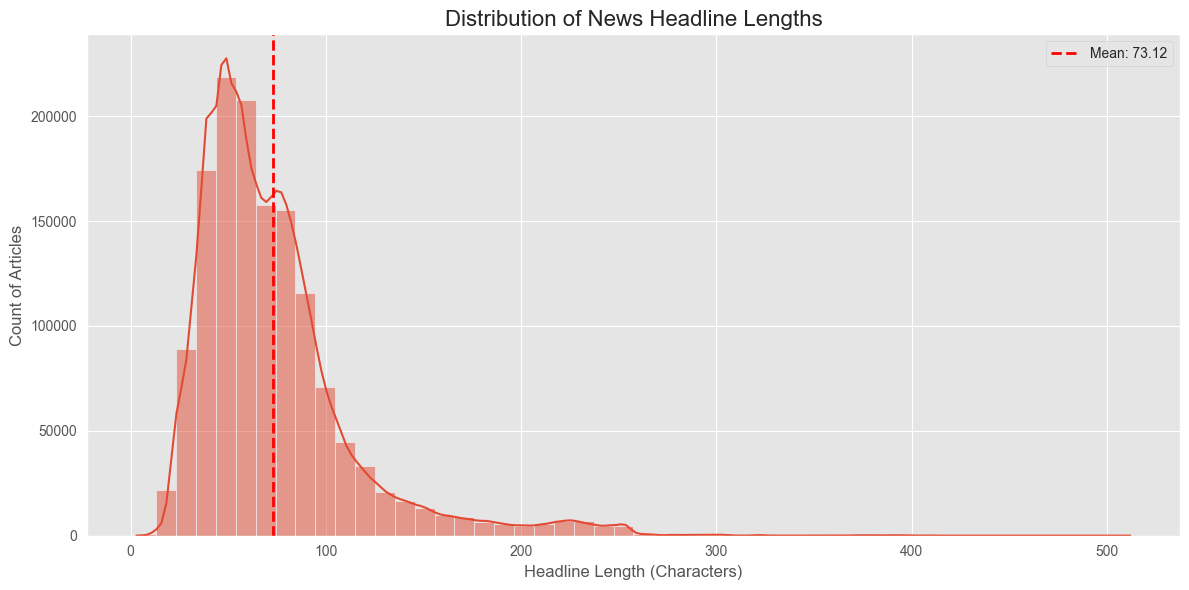


Example of the Longest Headline (512 chars):
JinkoSolar Tiger Pro Series Receives World's First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world's first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser

Example of the Shortest Headline (3 chars):
SPY


In [28]:
# Cell 2: Calculate and Analyze Headline Length

# 1. Drop the unnecessary index column
df_news = df_news.drop(columns=['Unnamed: 0'], errors='ignore')

# 2. Calculate Headline Length (Character Count)
df_news['headline_length'] = df_news['headline'].str.len()

# 3. Obtain Basic Descriptive Statistics
print("--- Descriptive Statistics for Headline Length (in characters) ---")
headline_stats = df_news['headline_length'].describe()
print(headline_stats)

# 4. Visualization: Plot the Distribution of Headline Lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Create a histogram to show the frequency distribution
sns.histplot(
    df_news['headline_length'],
    bins=50,
    kde=True,
    palette='viridis' # Use a distinct color palette
)
plt.title('Distribution of News Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Count of Articles', fontsize=12)
plt.axvline(headline_stats['mean'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {headline_stats['mean']:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Identify the shortest and longest headlines (optional, but insightful)
print(f"\nExample of the Longest Headline ({headline_stats['max']:.0f} chars):")
print(df_news.loc[df_news['headline_length'].idxmax(), 'headline'])

print(f"\nExample of the Shortest Headline ({headline_stats['min']:.0f} chars):")
print(df_news.loc[df_news['headline_length'].idxmin(), 'headline'])

--- Top 10 Most Active Publishers ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Total number of unique publishers: 1034
Top 10 publishers contribute 66.53% of all articles.


C:\Users\Mer\AppData\Local\Temp\ipykernel_10440\2673424907.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


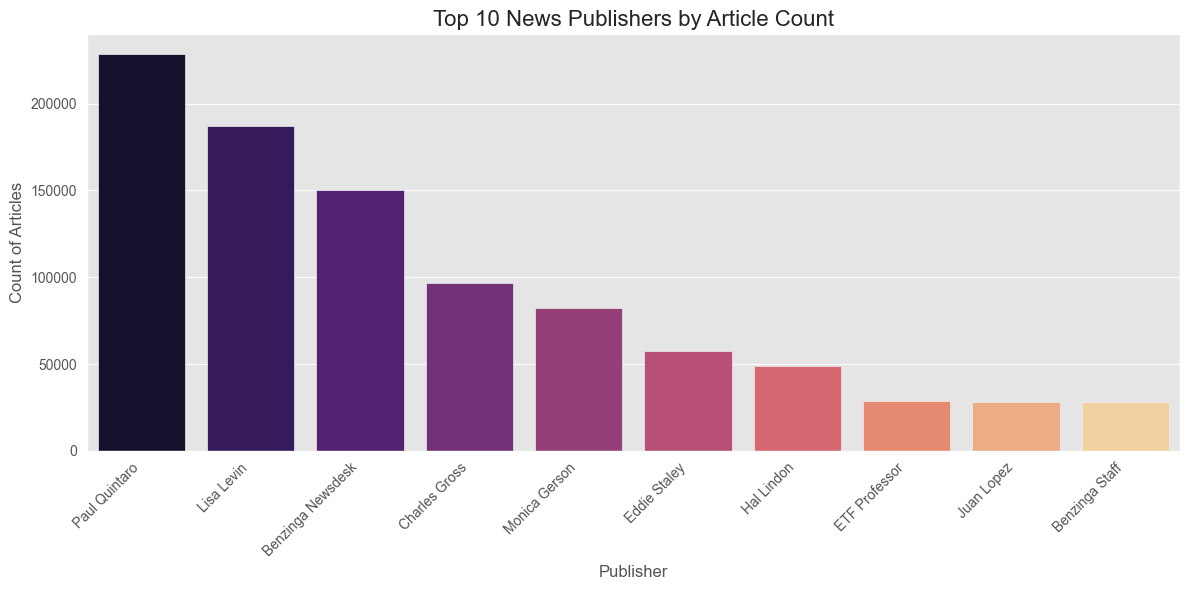

In [29]:
# Cell 3: Publisher Analysis

# 1. Count the number of articles per publisher and display the top 10
publisher_counts = df_news['publisher'].value_counts()
print("--- Top 10 Most Active Publishers ---")
print(publisher_counts.head(10))

# 2. Calculate the total number of unique publishers
total_unique_publishers = publisher_counts.shape[0]
print(f"\nTotal number of unique publishers: {total_unique_publishers}")

# 3. Calculate the cumulative percentage of coverage by the top 10 publishers
top_10_coverage = publisher_counts.head(10).sum() / len(df_news)
print(f"Top 10 publishers contribute {top_10_coverage:.2%} of all articles.")

# 4. Visualization: Bar plot of the Top 10 Publishers
plt.figure(figsize=(12, 6))
sns.barplot(
    x=publisher_counts.head(10).index,
    y=publisher_counts.head(10).values,
    palette='magma' # Use a different color palette for clarity
)
plt.title('Top 10 News Publishers by Article Count', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

--- Date Conversion Check (Now UTC) ---
Data type: datetime64[ns, UTC]
First 5 dates (should end in +00:00 for UTC):
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]


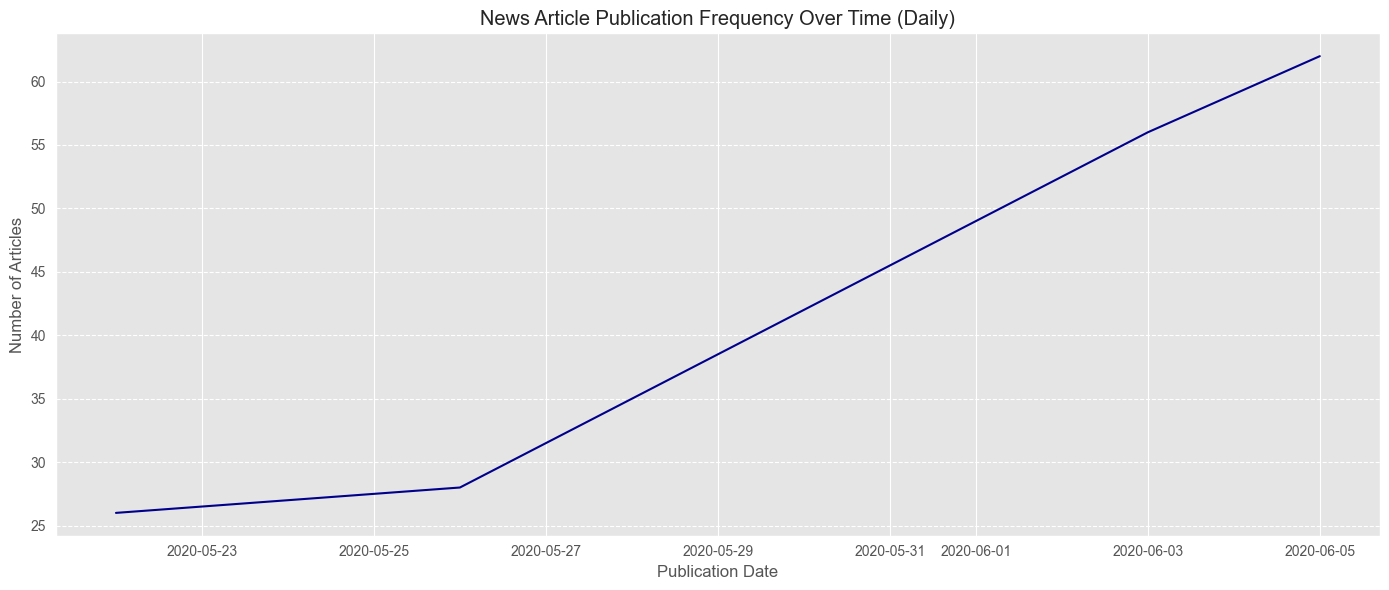

C:\Users\Mer\AppData\Local\Temp\ipykernel_10440\3085388726.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_labels, y=day_counts.values, palette='viridis')


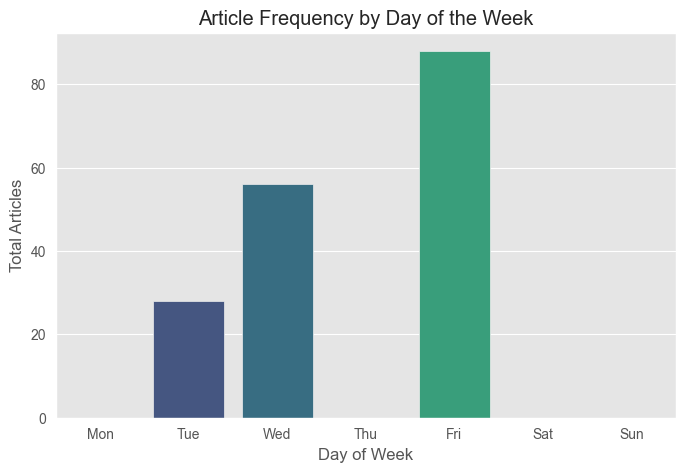

In [34]:
# Cell 4: Time Series Analysis - Date and Frequency

# ... (Date conversion steps should be kept as corrected previously) ...

# 1. Convert the 'date' column to a datetime object, coercing errors
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')

# Check for and drop any dates that could not be parsed
if df_news['date'].isna().any():
    initial_count = len(df_news)
    df_news = df_news.dropna(subset=['date']).copy()
    print(f"Dropped {initial_count - len(df_news)} rows with unparsable dates.")

# 2. Handle Timezone Conversion
try:
    df_news['date'] = df_news['date'].dt.tz_localize('America/New_York')
    df_news['date'] = df_news['date'].dt.tz_convert('UTC')
except TypeError:
    df_news['date'] = df_news['date'].dt.tz_convert('UTC')

print("--- Date Conversion Check (Now UTC) ---")
print(f"Data type: {df_news['date'].dtype}")
print("First 5 dates (should end in +00:00 for UTC):")
print(df_news['date'].head())


# 3. Analyze News Frequency Over Time (Daily)
df_news['publication_date'] = df_news['date'].dt.normalize().dt.date
daily_frequency = df_news.groupby('publication_date').size()

plt.figure(figsize=(14, 6))
daily_frequency.plot(title='News Article Publication Frequency Over Time (Daily)', color='darkblue')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# 4. Analyze News Frequency by Day of the Week (FIXED)
df_news['day_of_week'] = df_news['date'].dt.dayofweek
# Fix: Ensure all days (0-6) are present, even if count is 0
day_counts = df_news['day_of_week'].value_counts().reindex(range(7), fill_value=0).sort_index()

plt.figure(figsize=(8, 5))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Now day_labels (7 elements) matches day_counts.values (7 elements)
sns.barplot(x=day_labels, y=day_counts.values, palette='viridis')
plt.title('Article Frequency by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Articles')
plt.show()

--- Top 20 Most Frequent Keywords in Financial News Headlines ---
         Keyword  Frequency
0         stocks        137
1            hit        118
2         52week        118
3          highs        118
4         friday         92
5      wednesday         56
6        biggest         30
7         movers         28
8         moving         19
9        fridays         19
10        midday         19
11       session         19
12       agilent          5
13  technologies          5
14     maintains          4
15        raises          3
16       neutral          2
17       changes          2
18    securities          1
19          cfra          1


C:\Users\Mer\AppData\Local\Temp\ipykernel_10440\1753950784.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=top_20_keywords, palette='rocket')


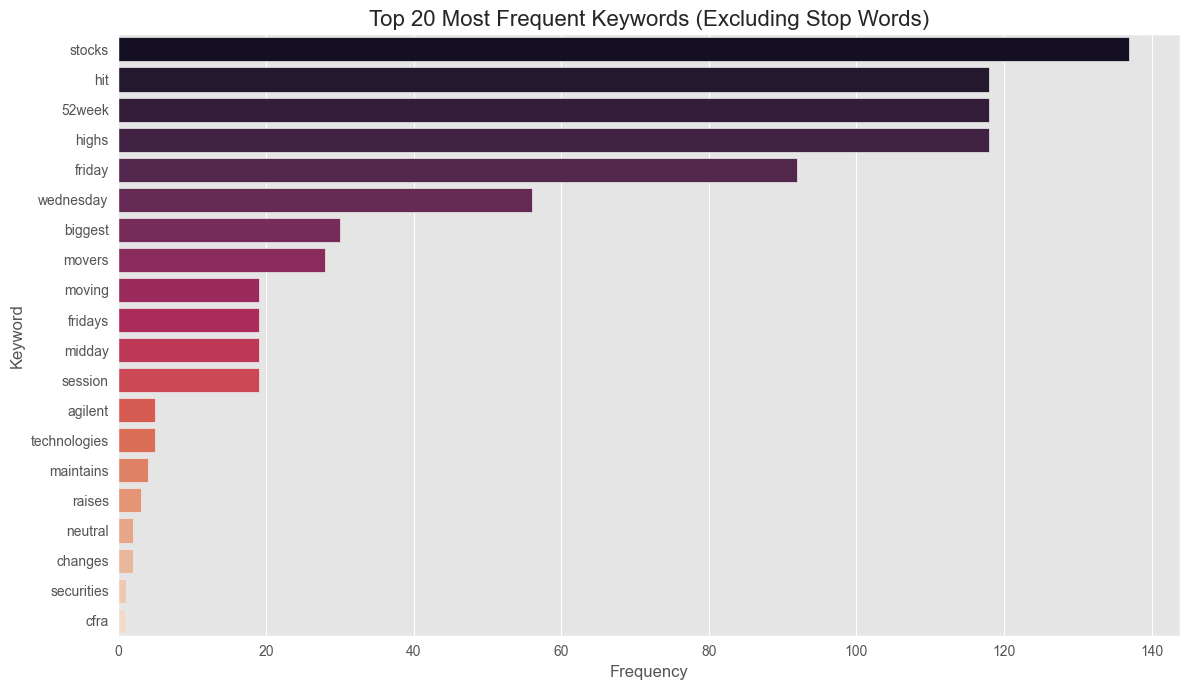

In [35]:
# Cell 5: Text Analysis - Topic Modeling (Keyword Frequency)

import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import string

# Download NLTK stop words if not already done (run this once)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    
# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Add specific financial/news-related stop words that might clutter the results
custom_stop_words = set([
    'stock', 'company', 'says', 'new', 'time', 'day', 'week', 'report', 
    'market', 'traders', 'update', 'share', 'analyst', 'ratings', 'ceo',
    'investors', 'inc', 'corp', 'co', 'price', 'target' # Adding 'price' and 'target' for more focused topic extraction
])
stop_words.update(custom_stop_words)


def clean_and_tokenize(text):
    """Clean text, remove punctuation/stopwords, and tokenize."""
    if pd.isna(text):
        return []
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    # Tokenize and remove stop words and single-character tokens
    tokens = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return tokens

# 1. Apply cleaning and tokenization to all headlines
all_tokens = df_news['headline'].apply(clean_and_tokenize).explode()

# 2. Count the frequency of each word
word_counts = Counter(all_tokens.dropna())

# 3. Get the Top 20 most common keywords
top_20_keywords = pd.DataFrame(word_counts.most_common(20), columns=['Keyword', 'Frequency'])

print("--- Top 20 Most Frequent Keywords in Financial News Headlines ---")
print(top_20_keywords)


# 4. Visualization: Bar plot of the Top 20 Keywords
plt.figure(figsize=(12, 7))
sns.barplot(x='Frequency', y='Keyword', data=top_20_keywords, palette='rocket')
plt.title('Top 20 Most Frequent Keywords (Excluding Stop Words)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.tight_layout()
plt.show()